# 스터디 공유 사항 정리
- 꿀팁1: 범주형 자료도 describe 가능
- 꿀팁2: FacetGrid(패싯그리드), 다중범주그래프에 유용
- 꿀팁3: 할 때마다 괜히 찾아봐서 시간 아까운 칼럼 제거 방법 암기
- 꿀팁4: 훈련, 테스트셋 아예 병합하는 게 아니라 list로 합쳐서 동시 전처리
- 꿀팁5: 영어 이름 칼럼 그냥 버리지 않고 활용하는 법(꿀팁6, 꿀팁7 포함)
- 꿀팁6. .으로 끝나는 단어 정규표현식
- 꿀팁7. crosstab, 범주형 변수 기준으로 개수 파악이나 수치형 데이터 넣어 계산할 때 사용
- 꿀팁8. 범주형 변수 -> 수치형 변환 할 때 dictionary, map 사용해서 간편하게!
- 꿀팁9. 결측치 처리하는 방법
- 꿀팁10. np.zeros(( , ))
- 꿀팁11. loc 활용해서 결측치 채우는 방법
- 꿀팁12. 연령 -> 연령'대' (cut , loc활용)

## 구글드라이브에서 코랩으로 데이터 불러오기

In [1]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pwd

'/content'

In [3]:
from google.colab import files
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/test.csv')
combine = [train_df, test_df]

## 라이브러리 설치

In [4]:
# data analysis and wrangling
'''데이터 랭글링(Data Wrangling) 혹은 데이터 먼징(Data Munging)이라고 불리는 이것은 
원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하는 것'''
import pandas as pd
import numpy as np
import random as random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 데이터 살펴보기(Describing)

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- 범주형: 'Survived', 'Sex', 'Embarked'
- 순서형: 'Pclass' (순서형 어떻게 다루는지 아래서 살펴보기)
- 연속형: 'Age', 'Fare'
- 이산형: 'SibSp', 'Parch'

칼럼 설명

1. 'PassengerId' : pass
2. 'Survived' : 0 = 사망, 1 = 생존
3. 'Pclass' : 1등석, 2등석, 3등석
4. 'Name' : 이름
5. 'Sex' : male = 남성, female = 여성
6. 'Age' : 나이
7. 'SibSp' :동승한 자매, 배우자 수
8. 'Parch': 동승한 부모, 자식 수
9. 'Ticket' : 티켓번호
10. 'Fare' : 승객 요금
11. 'Cabin' : 방 호수
12. 'Embarked' : 탑승지, C = 세르부르, Q = 퀸즈타운, S = 샤우샘프턴

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.info()
print('_'*40)
test_df.info()

'''
Ticket, Cabin, Passengerid, Name은 결측치가 많거나, 고유번호나 이름이므로 생존에 영향을 미치지 않을 것이라 판단하여 drop 예정
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

'\nTicket, Cabin, Passengerid, Name은 결측치가 많거나, 고유번호나 이름이므로 생존에 영향을 미치지 않을 것이라 판단하여 drop 예정\n'

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O']) # 꿀팁1: 범주형 자료도 describe 가능

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


새로운 칼럼 생성
- family(Parch+SibSp)
- age: 기존의 나이를 연령대(oridinal categorical)로 표현
- fare: 유의미하면 연령대처럼 range로 나타낼 수도
- name: 어떻게 할지,,,아래서 살펴보기

분류를 위한 가설
- 여자가 더 생존할 것이다.
- 아이들이 더 생존할 것이다.
- upper-class 승객이 더 생존할 것이다.

In [11]:
# 범주형 변수 피벗테이블(pivot table)

def pivottable(data, col_list, standard): # standard: groupby의 기준이 되는 칼럼
  display(data[col_list].groupby([standard], as_index=False).mean())

In [12]:
pivottable(train_df, ['Pclass', 'Survived'], 'Pclass')
print('-'*40)
pivottable(train_df, ['Sex', 'Survived'], 'Sex')
print('-'*40)
pivottable(train_df, ['SibSp', 'Survived'], 'SibSp')
print('-'*40)
pivottable(train_df, ['Parch', 'Survived'], 'Parch')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


----------------------------------------


,Sex,Survived
0,female,0.742038
1,male,0.188908


----------------------------------------


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


----------------------------------------


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 데이터 시각화

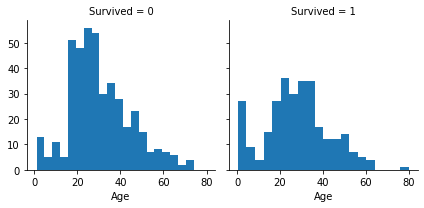

In [13]:
# 꿀팁2(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# y가 범주형일 때, 특정 칼럼의 histplot
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 생존 유무에 따른 연령 분포는 2040이 많은 것으로 비슷하나, 생존한 경우에 2040이 더 많음

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


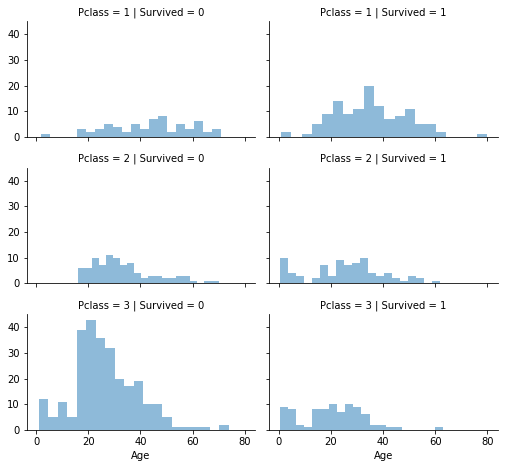

In [14]:
# 꿀팁2(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 histplot
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6) # aspect은 가로
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend() # 범례 추가해주는 건데 여기선 필요없음

- 눈에 띄는 것은 사망(0)한 경우, Pclass가 3인 경우가 압도적으로 많다는 점이다.
- 사망한 경우, 3등석으로 갈수록 많아진다.
- 생존한 경우, 근소하게 1등석의 경우가 다른 등급에 비해 더 많다.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


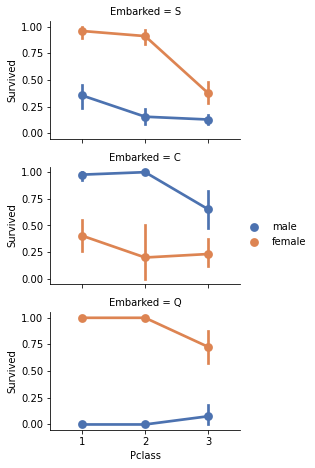

In [15]:
# 꿀팁2(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 pointplot(연속형 변수와 범주형 변수의 관계를 error bar와 함께 그려주는 그래프)
grid=sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6) # col로 해도 상관없음
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep') # x축: Pclass, y축: Survived, hue: sex, 깊이는 분포를 나타냄
grid.add_legend()

- Embarked가 Q인 경우에만 여성이 생존한 경우가 더 많다.
- 전반적으로 Pclass가 1일 때, 생존한 경우가 더 많다.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


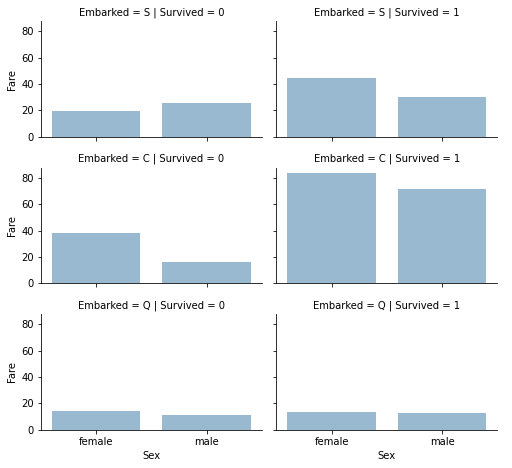

In [16]:
# 꿀팁2(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 barplot
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

- 요금을 많이 낸 승객일수록 생존한 경우가 많다.
- Embarked도 생존과 관련이 있는 듯하다. (1, 2행 그래프)

## 데이터 정리하기(Wrangle data)

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) # 꿀팁3, 칼럼제거
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1) # 꿀팁3, 칼럼제거
combine=[train_df, test_df] # 꿀팁4, 이런 식으로 훈련, 테스트 데이터셋을 동시에 전처리 하는 거 좋은 듯

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 이름 칼럼 그냥 버리지 않고 분석 진행함(꿀팁5)

In [18]:
for dataset in combine:
  dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # 꿀팁6. .으로 끝나는 단어 추출하는 정규표현식

pd.crosstab(train_df['Title'], train_df['Sex']) # 꿀팁7, 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 성별을 나타내는 title이 잘 추출됨

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- Miss, Mrs가 Mr보다 확실히 생존하는 경우가 많음, 유의미한 변수로서 인정

In [20]:
# 꿀팁8: 범주형 변수 인코딩(레이블링)하는 법. replace안해도됨!
title_mapping={"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
  dataset['Title']=dataset['Title'].map(title_mapping) # 핵심
  dataset['Title']=dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine=[train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 범주형 변수 인코딩 (수치 변환)

In [22]:
for dataset in combine:
  dataset['Sex']=dataset['Sex'].map( {'female':1, 'male':0}).astype(int) # 꿀팁8: 형변환까지 동시에!

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 수치형, 연속형 변수 전처리 (completing)

꿀팁9. 결측치를 처리하는 방법
1. (간단한 방법) 평균과 표준 편차 사이에 난수 생성
2. (더 정확한 방법) 상관관계가 있는 변수를 사용하는 것. 
- 여기서는, 연령과 성별(Gender), Pclass 간의 상관관계 확인 가능. 
- Pclass와 성별 조합에서 연령에 대한 중위수 값을 사용하여 연령값을 추측
- 따라서, Pclass=1 and Gender=0, Pclass=1 and Gender=1 등등

방법 1, 2 결합
- 중위수를 기반으로 나이값을 추출하는 대신, Pclass와 Gender 조합 집합을 기반으로 평균과 표준편차 사이에 난수를 사용

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


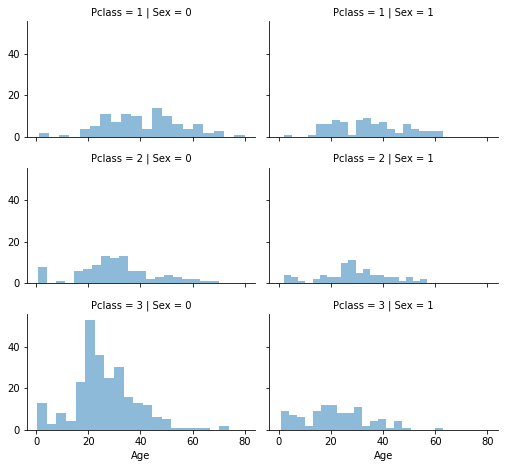

In [23]:
# 변수 간 상관관계 확인
grid=sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [24]:
guess_ages=np.zeros((2,3)) # 꿀팁10, 빈 array만들기
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# 꿀팁11, 이렇게 결측치 채운다는 거 알아두기
# sex=(0, 1), Pclass=(1, 2, 3)
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            print(guess_ages)
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

[[40.  0.  0.]
 [ 0.  0.  0.]]
[[40. 30.  0.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [35.  0.  0.]]
[[40. 30. 25.]
 [35. 28.  0.]]
[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42.  30.  25. ]
 [35.  28.  21.5]]
[[42.  28.  25. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [41.  28.  21.5]]
[[42.  28.  24. ]
 [41.  24.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
# 꿀팁12, 연령을 연령'대'로 변환 (cut함수)
train_df['AgeBand']=pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
# 꿀팁12, 연령을 연령'대'로 변환 (loc를 활용할 것)
for dataset in combine:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine=[train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 새로운 변수 생성

In [29]:
# 가족 구성원 수 변수 생성
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
# 혼자 탑승한 승객은 따로 변수 생성
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1 , 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
# Pclass와 Age 결합, 다양하게 변수를 만드려는 시도로 보임
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10) 

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## 범주형 변수 추가 전처리

Embarked 변수는 S, Q, C 값으로 구성되어 있음.
여기서 훈련 데이터셋 내에 두 개의 누락된 값이 있으므로, 이를 가장 흔한(common) 사건들로 채워줌 # 꿀팁 비교용

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## 수치형 변수 추가 전처리

Fare 변수의 null값을 중앙값으로 채워줌

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


cut과 qcut의 차이

1. cut 함수
- 균등한 길이의 그룹
- 데이터의 분산에 따라 각각의 그룹마다 데이터 수가 다르게 나뉜다.



2. qcut 함수

- 같은 크기의 그룹
- 표본 변위치를 기반으로 데이터를 나누어, 적당히 같은 크기의 그룹으로 나눌 수 있다.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modeling
1. Logistic Regression
2. KNN
3. Support Vector Machines
4. Navie Bayes classifier
5. Decision Tree
6. Random Forest
7. Perceptron
8. ANN(Artificial neural network)
9. RVM(Relevance Vector Machine)

In [41]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy() # 꿀팁. 여기서 copy
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.36

In [46]:
logreg.coef_

array([[-0.75069954,  2.20161947,  0.28701121, -0.08665536,  0.2614725 ,
         0.39788768,  0.12655329, -0.3110693 ]])

In [48]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [50]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [51]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [53]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [54]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.01

In [55]:
# SGD(Stochastic Gradient Descent)

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.86

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [57]:
# RandomForest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## Model Evaluation

In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Descent,74.86
4,Naive Bayes,72.28


In [61]:
submission = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                           'Survived': Y_pred})

In [62]:
submission

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
